## RRT 과정
1. 트리를 초기화 한다. (출발 노드(𝒒_𝒊𝒏𝒊)를 트리로 넣는다.)
2. 샘플 노드(𝒒_𝒓𝒂𝒏𝒅)를 한 개 생성한다.
3. 가장 가까운 노드 (𝒒_𝒏𝒆𝒂𝒓)를 찾는다.
4. 가장 가까운 노드(𝒒_𝒏𝒆𝒂𝒓)에서 샘플 노드(𝒒_𝒓𝒂𝒏𝒅)방향으로 연결한 직선상에 일정한 거리(𝜸)만큼 떨어진 새로운 노드(𝒒_𝒏𝒆𝒘) 선정한다. 
5. 만약 가장 가까운 노드(𝒒_𝒏𝒆𝒂𝒓)에서 새로운 노드(𝒒_𝒏𝒆𝒘)까지 직선으로 연결한 선이 장애물과 충돌하지 않으면 새로운 노드(𝒒_𝒏𝒆𝒘)를 트리로 넣는다.
6. 목표 노드에 도달할 때까지 2~5 과정을 반복한다.

## 활용할 수 있는 함수 
cv2.circle(img, center, radian, color, thickness) <br>
cv2.line(img, start, end, color, thickness) <br>
random.randint(low, high=None, size=None, dtype=int) <br>

---------------------------------------------------------------------------

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
class point:
    x: int = None
    y: int = None
        
# 거리계산
def calDist(p1, p2):
    return np.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)

tree = [] # 트리 
qInit = point() # 출발노드 
qGoal = point() # 끝 노드 
qRand = point() # 샘플노드 
qNew = point() # 새로운 노드 

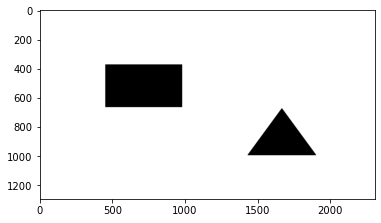

In [3]:
map_ori = cv2.imread('map.png')
map_ori = cv2.cvtColor(map_ori, cv2.COLOR_BGR2RGB)
#plt.axis('off') # 창에있는 x축 y축 제거
plt.imshow(map_ori)
plt.show()
#(373 449) (665 977)

In [4]:
# init point 출발노드 설정 
qInit.x = 50
qInit.y = 50
tree.append(qInit) # 트리에 출발노드 추가 
map_rrt = cv2.circle(map_ori, (qInit.x,qInit.y), 20, (255,0,0), -1)

# goal point 목표 노드 설정 
qGoal.x = 1000
qGoal.y = 1000
map_rrt = cv2.circle(map_rrt, (qGoal.x,qGoal.y), 20, (0,0,255), -1)

y_max = map_ori.shape[0]
x_max = map_ori.shape[1]
print(y_max, x_max)

1296 2304


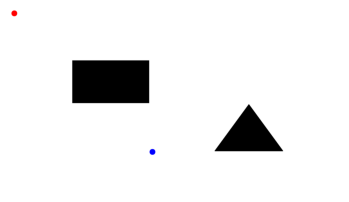

In [5]:
plt.axis('off') # 창에있는 x축 y축 제거
plt.imshow(map_rrt)
plt.show()

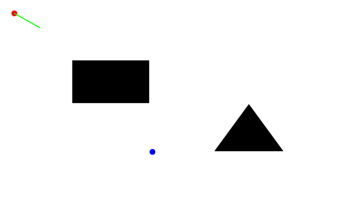

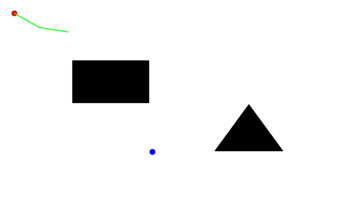

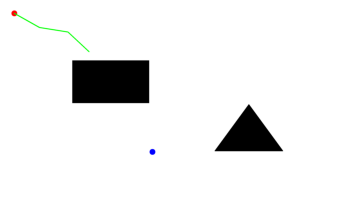

장애물과 충돌하였습니다. 




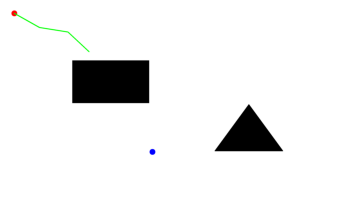

장애물과 충돌하였습니다. 




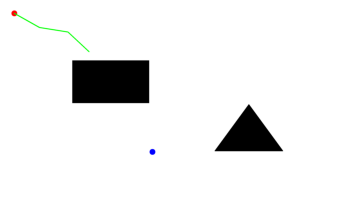

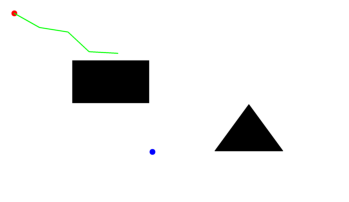

장애물과 충돌하였습니다. 




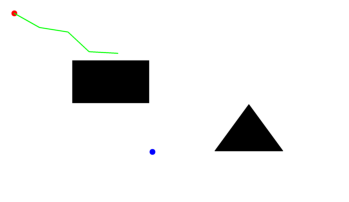

장애물과 충돌하였습니다. 




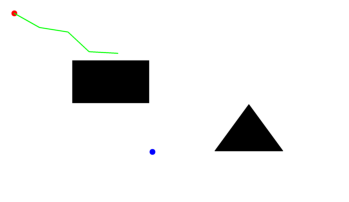

장애물과 충돌하였습니다. 




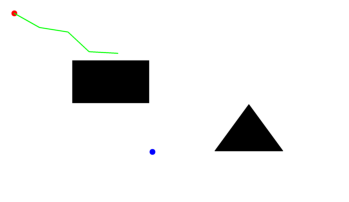

장애물과 충돌하였습니다. 




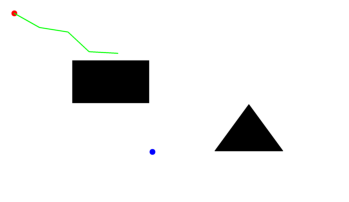

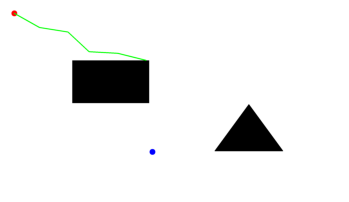

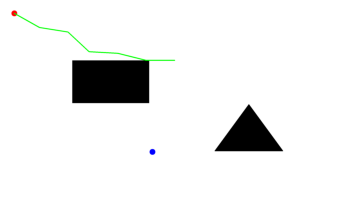

장애물과 충돌하였습니다. 




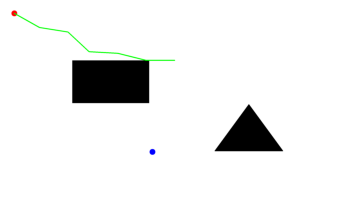

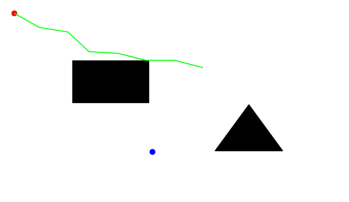

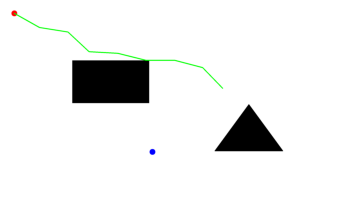

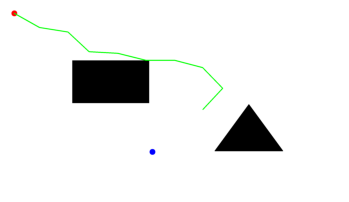

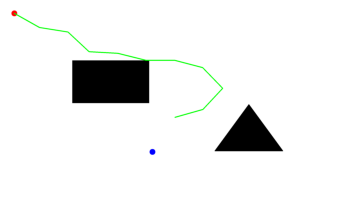

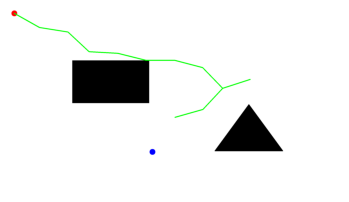

장애물과 충돌하였습니다. 




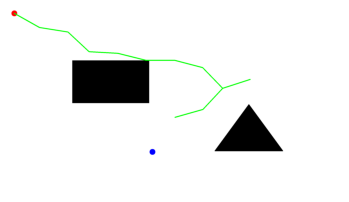

장애물과 충돌하였습니다. 




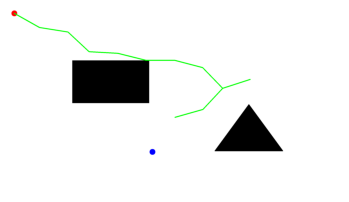

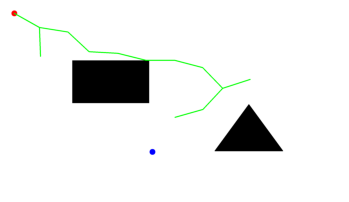

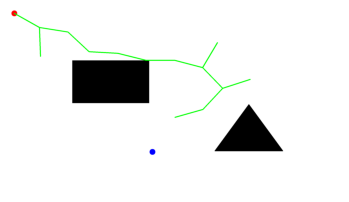

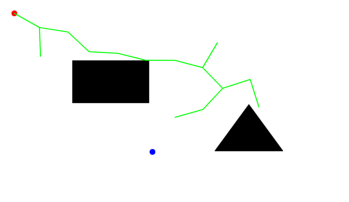

장애물과 충돌하였습니다. 




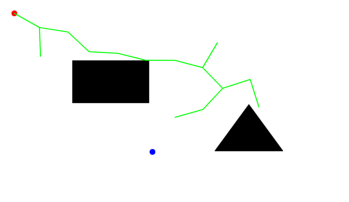

장애물과 충돌하였습니다. 




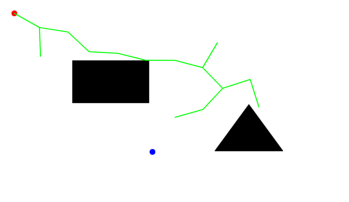

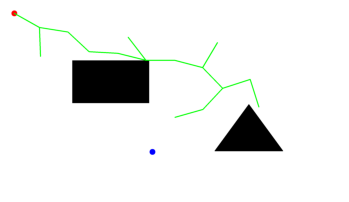

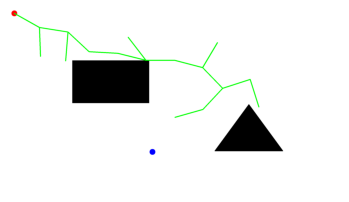

장애물과 충돌하였습니다. 




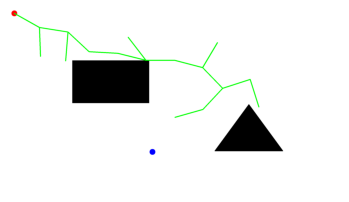

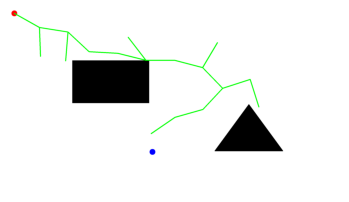

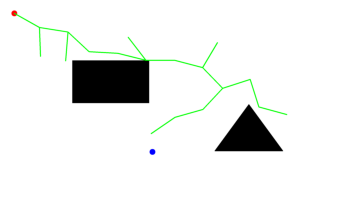

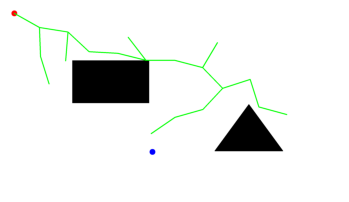

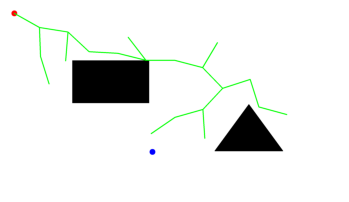

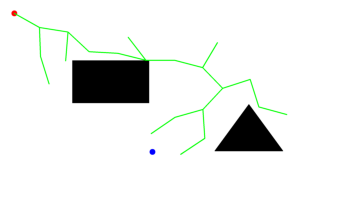

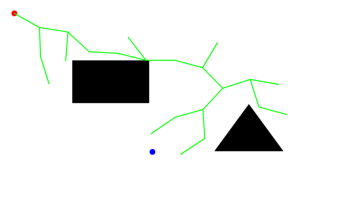

장애물과 충돌하였습니다. 




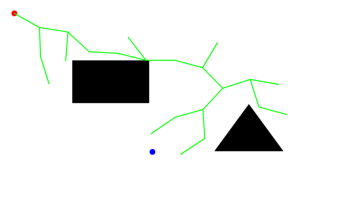

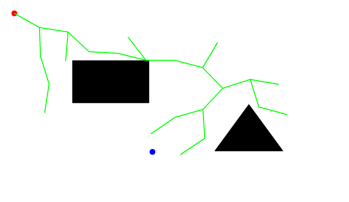

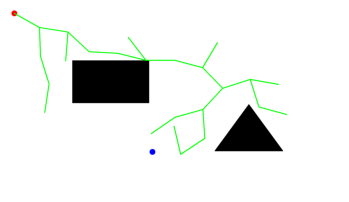

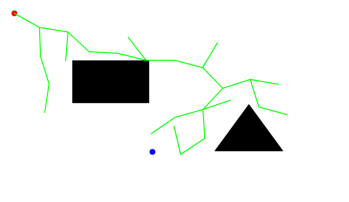

장애물과 충돌하였습니다. 




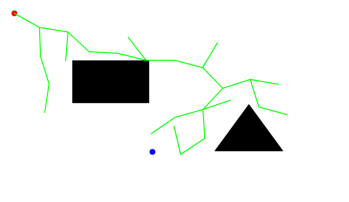

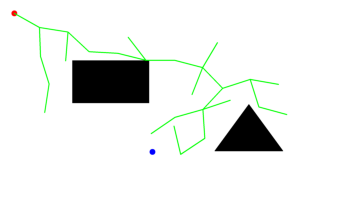

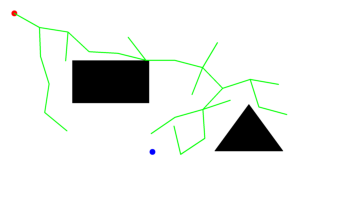

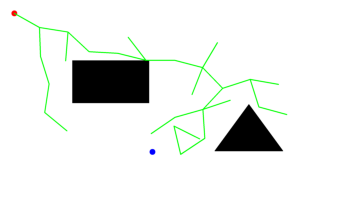

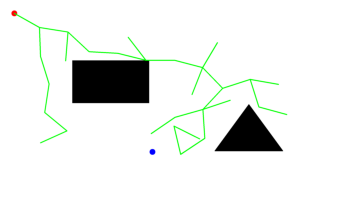

장애물과 충돌하였습니다. 




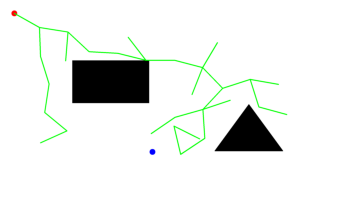

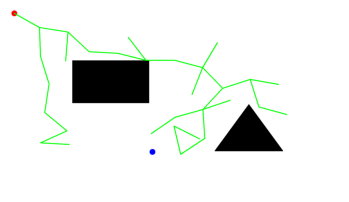

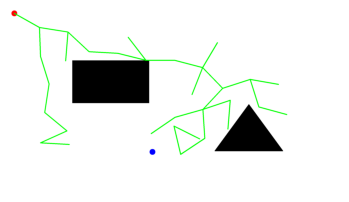

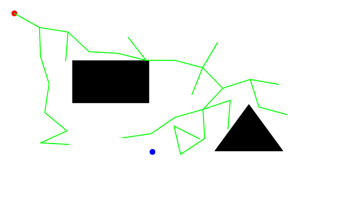

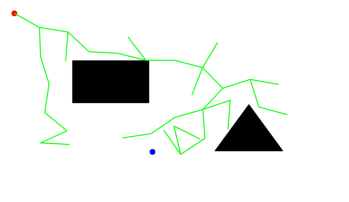

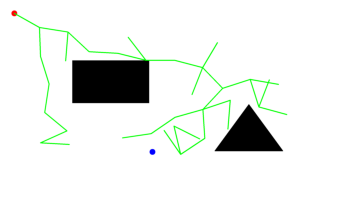

장애물과 충돌하였습니다. 




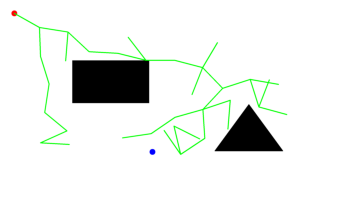

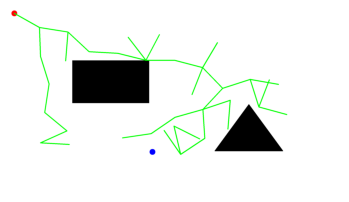

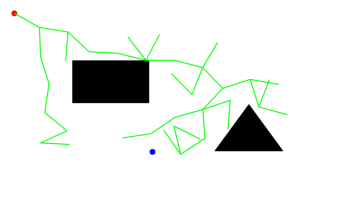

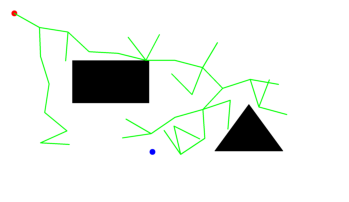

장애물과 충돌하였습니다. 




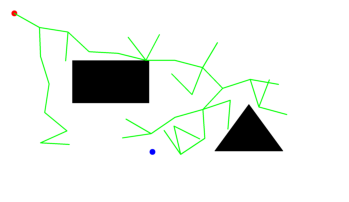

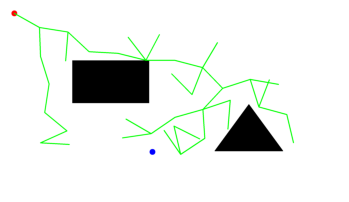

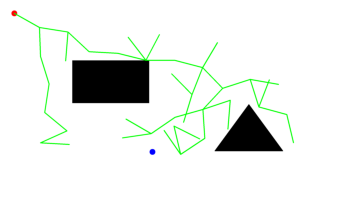

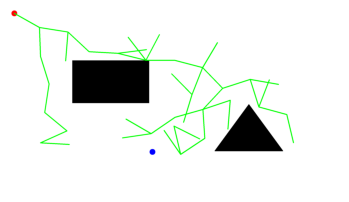

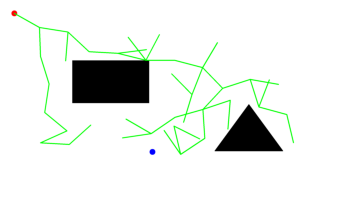

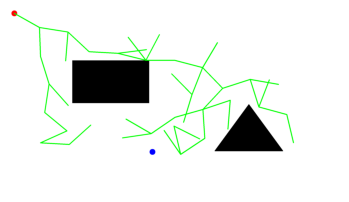

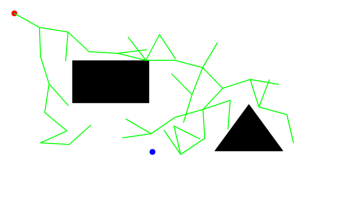

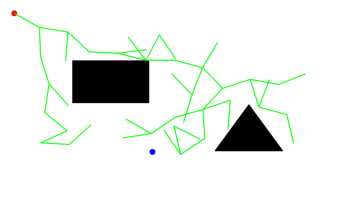

장애물과 충돌하였습니다. 




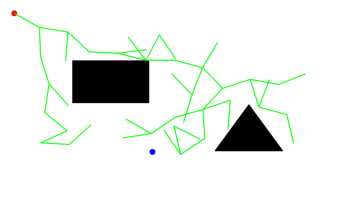

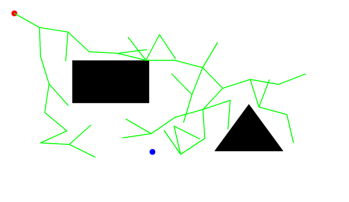

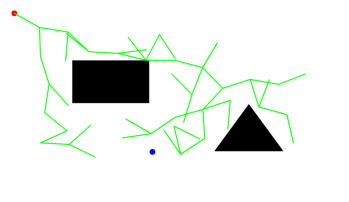

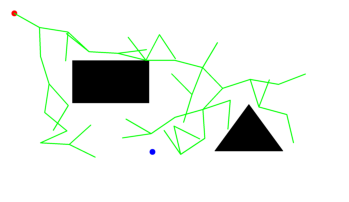

장애물과 충돌하였습니다. 




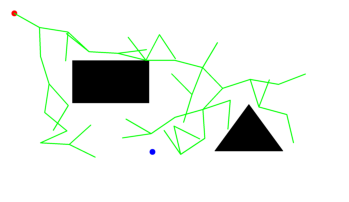

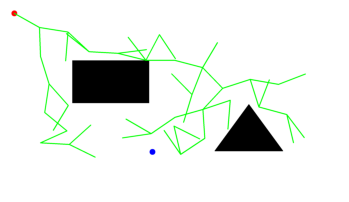

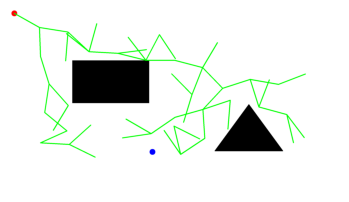

장애물과 충돌하였습니다. 




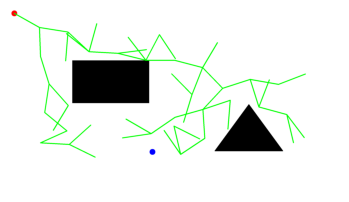

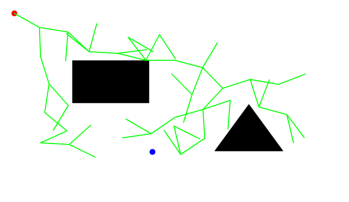

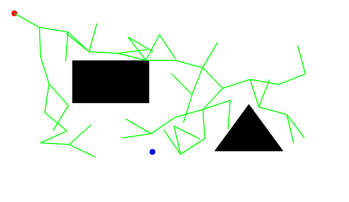

장애물과 충돌하였습니다. 




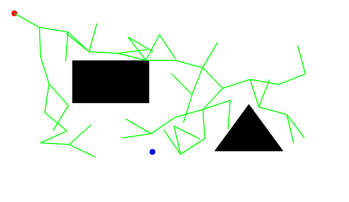

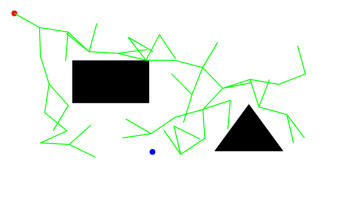

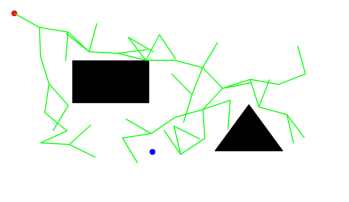

장애물과 충돌하였습니다. 




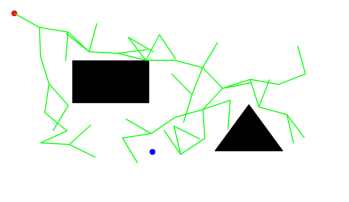

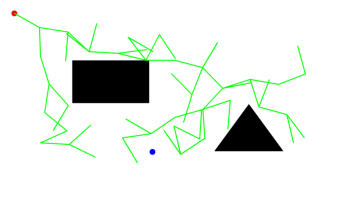

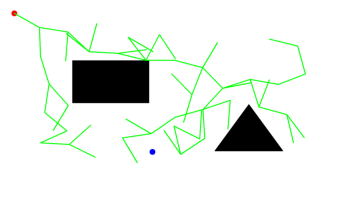

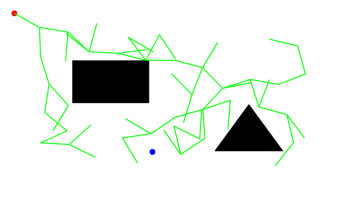

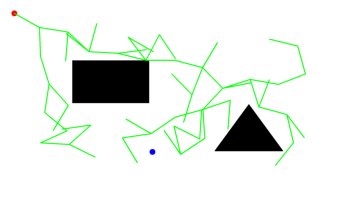

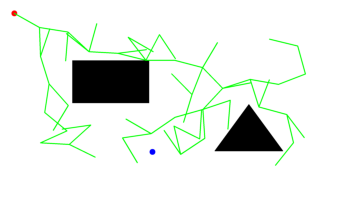

장애물과 충돌하였습니다. 




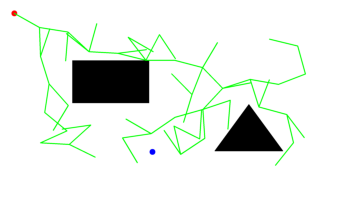

장애물과 충돌하였습니다. 




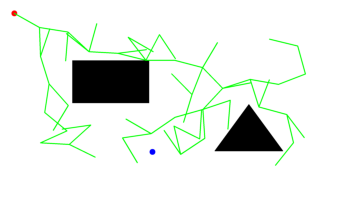

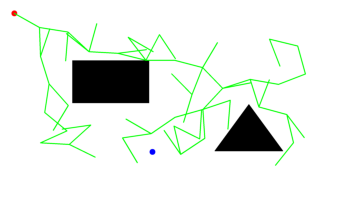

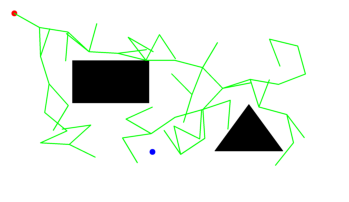

장애물과 충돌하였습니다. 




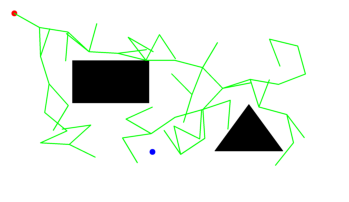

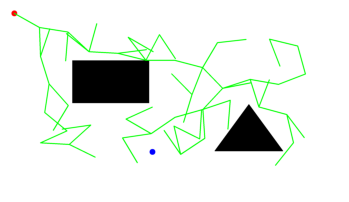

장애물과 충돌하였습니다. 




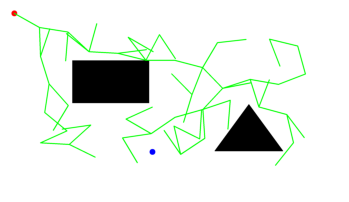

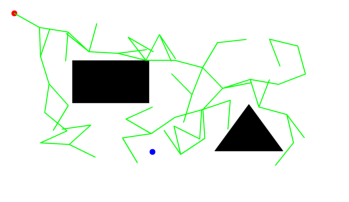

장애물과 충돌하였습니다. 




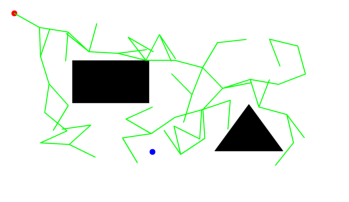

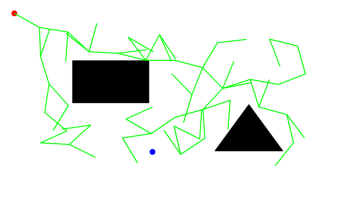

목표물 




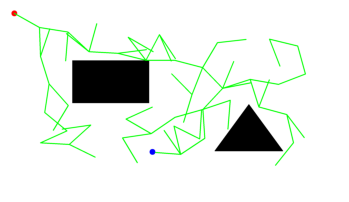

In [6]:
while True:
    #  mIndex +=1
    gamma = 200
# 새로운 노드의 지점 만들기 
    qRand.x = np.random.randint(0+gamma, x_max-gamma)
    qRand.y = np.random.randint(0+gamma, y_max-gamma)

# 거리 리스트 
    dist2Rand = []
    for i in range(len(tree)):
        dist2Rand.append(calDist(qRand, tree[i]))
    m = min(dist2Rand)
    mIndex = dist2Rand.index(m)


    rad = math.atan2(qRand.y-tree[mIndex].y, qRand.x-tree[mIndex].x)
    obstacle = False
    Goal = False
    check = point()
    n=0
    for i in range(gamma):
        check.x = int(np.cos(rad)*i + tree[mIndex].x)
        check.y = int(np.sin(rad)*i + tree[mIndex].y)
    
    
        if list(map_rrt[check.y, check.x]) == list([0,0,0]):            
            print("장애물과 충돌하였습니다. \n\n")
            obstacle = True
            break
            
        if list(map_rrt[check.y, check.x]) == list([0,0,255]):            
            Goal = True
            break
   
    
    if obstacle == False:
        cv2.line(map_rrt, (tree[mIndex].x, tree[mIndex].y), (check.x, check.y), (0,255,0), 5)
        tree.append(check)
    
    if Goal == True:
        print("목표물 \n\n")
        plt.axis('off') # 창에있는 x축 y축 제거
        plt.imshow(map_rrt)
        plt.show()
        break
    
    plt.axis('off') # 창에있는 x축 y축 제거
    plt.imshow(map_rrt)
    plt.show()        
    
